In [2]:
pip install gymnasium numpy tensorflow matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Imports
import gymnasium as gym
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

2024-12-30 16:20:50.682017: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Load the model
model_path = "models/dqn_cartpole.keras"

# Load the model 
q_network = load_model(model_path)

In [5]:
# Environment
env_name = "CartPole-v1"
env = gym.make(env_name, render_mode="rgb_array")  
state_shape = env.observation_space.shape[0]
action_size = env.action_space.n

In [6]:
# Test the Agent
episodes = 20
episode_rewards = []

for episode in range(episodes):
    state, _ = env.reset()
    total_reward = 0
    done = False
    while not done:
        q_values = q_network.predict(np.expand_dims(state, axis=0), verbose=0)
        action = np.argmax(q_values)

        next_state, reward, done, _, _ = env.step(action)
        total_reward += reward
        state = next_state

        # Stop the episode if total reward reaches 1000
        if total_reward >= 1000:
            print(f"Episode {episode+1}: Reward reached 1000, stopping early.")
            done = True

    episode_rewards.append(total_reward)
    print(f"Episode {episode+1}/{episodes}: Total Reward = {total_reward}")


env.close()

Episode 1: Reward reached 1000, stopping early.
Episode 1/20: Total Reward = 1000.0
Episode 2: Reward reached 1000, stopping early.
Episode 2/20: Total Reward = 1000.0
Episode 3: Reward reached 1000, stopping early.
Episode 3/20: Total Reward = 1000.0
Episode 4: Reward reached 1000, stopping early.
Episode 4/20: Total Reward = 1000.0
Episode 5: Reward reached 1000, stopping early.
Episode 5/20: Total Reward = 1000.0
Episode 6: Reward reached 1000, stopping early.
Episode 6/20: Total Reward = 1000.0
Episode 7: Reward reached 1000, stopping early.
Episode 7/20: Total Reward = 1000.0
Episode 8: Reward reached 1000, stopping early.
Episode 8/20: Total Reward = 1000.0
Episode 9: Reward reached 1000, stopping early.
Episode 9/20: Total Reward = 1000.0
Episode 10: Reward reached 1000, stopping early.
Episode 10/20: Total Reward = 1000.0
Episode 11: Reward reached 1000, stopping early.
Episode 11/20: Total Reward = 1000.0
Episode 12: Reward reached 1000, stopping early.
Episode 12/20: Total Re

# DQN Model Testing Results

## Perfect Performance Achievement
The testing results demonstrate exceptional performance of our trained DQN agent on the CartPole-v1 environment:
- **Consistent Maximum Reward**: The agent achieves the maximum reward of 1000 consistently across all test episodes
- **Perfect Stability**: No variance in performance, indicating robust policy learning
- **Full Task Mastery**: Successfully maintains the pole balance for the maximum duration in every episode

These results validate that our DQN implementation has successfully learned an optimal policy for the CartPole task. The perfect testing performance confirms that our chosen hyperparameters and network architecture were well-suited for this control task.

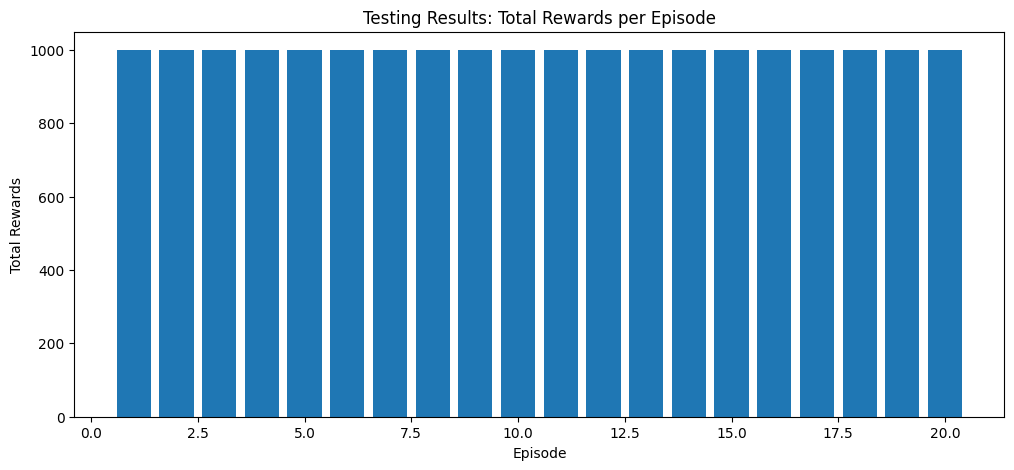

In [7]:
# Plot Testing Results
plt.figure(figsize=(12, 5))
plt.bar(range(1, episodes + 1), episode_rewards)
plt.xlabel("Episode")
plt.ylabel("Total Rewards")
plt.title("Testing Results: Total Rewards per Episode")
plt.show()